In [71]:
import matplotlib.pyplot as plt
from collections import Counter
import os
import json
import numpy as np

# MODEL_NAME = "bert-base-uncased"
MODEL_PATH = "../../models/bert-base-uncased"
RAW_DIR = "../../data/STAC/raw"
PROCESSED_DIR = "../../data/STAC/processed"
DIM_FEATURE = 768
NUM_DIALOGUES_PER_SAMPLE = 10
QUANTILE = 0.8


with open(os.path.join(RAW_DIR, "dialogues.json"), "r", encoding="utf-8") as f:
    dialogues = json.load(f)

speakers = [list(set([edu["speaker"] for edu in item["edus"]])) for item in dialogues]
speakers = [item for sublist in speakers for item in sublist]
speaker_counts = Counter(speakers)
threshold = np.quantile(list(speaker_counts.values()), QUANTILE)
speaker_counts = dict(filter(lambda x: x[1] > threshold, speaker_counts.items()))
candidate_speakers = list(speaker_counts.keys())

candidate_speakers = set(candidate_speakers)
# filter dialogues by speaker
filtered_dialogues = []
for item in dialogues:
    speaker_set = set([edu["speaker"] for edu in item["edus"]])
    if not speaker_set.isdisjoint(candidate_speakers):
        filtered_dialogues.append(item)

with open(
    os.path.join(RAW_DIR, f"dialogues_{QUANTILE}.json"), "w", encoding="utf-8"
) as f:
    json.dump(filtered_dialogues, f)

Draw speaker distribution figure


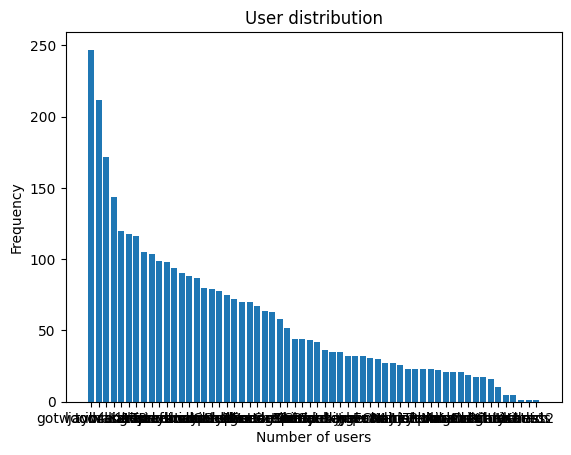

In [46]:
# plt.hist(sorted(speaker_counts.values()),bins=len(speaker_counts))
x, y = zip(*speaker_counts)
plt.bar(x, y)
plt.xlabel("Number of users")
plt.ylabel("Frequency")
plt.title("User distribution")
print("Draw speaker distribution figure")
plt.show()

In [2]:
import matplotlib.pyplot as plt
import os
import json
import numpy as np
import torch

# MODEL_NAME = "bert-base-uncased"
MODEL_PATH = "../../models/bert-base-uncased"
RAW_DIR = "../../data/STAC/raw"
PROCESSED_DIR = "../../data/STAC/processed"
DIM_FEATURE = 768
NUM_DIALOGUES_PER_SAMPLE = 5
QUANTILE = 0.8
DEVICE = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")


with open(
    os.path.join(RAW_DIR, f"dialogues_{QUANTILE}.json"), "r", encoding="utf-8"
) as f:
    dialogues = json.load(f)
print(len(dialogues))

# shuffle the dialogues
np.random.shuffle(dialogues)

samples = []
for i in range(len(dialogues) // NUM_DIALOGUES_PER_SAMPLE):
    sample_dialogues = dialogues[i : i + NUM_DIALOGUES_PER_SAMPLE]
    num_texts = sum([len(item["edus"]) for item in sample_dialogues])
    embeddings = torch.zeros((num_texts, DIM_FEATURE), device=DEVICE)
    

FileNotFoundError: [Errno 2] No such file or directory: '../../data/STAC/raw/dialogues_0.8.json'

In [11]:
import json

MODEL_PATH = "../../models/bert-base-uncased"
RAW_DIR = "../../data/STAC/raw"
PROCESSED_DIR = "../../data/STAC/processed"
DIM_FEATURE = 768
NUM_DIALOGUES_PER_SAMPLE = 5
QUANTILE = 0.8
DEVICE = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

with open(
    os.path.join(RAW_DIR, f"dialogues.json"), "r", encoding="utf-8"
) as f:
    dialogues = json.load(f)

print(len(dialogues))

1161
